In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
def f_example(x):
    return np.exp(x) - np.log(x)
def first_derivative(x):
    return np.exp(x) - (1 / x)
def second_derivative(x):
    return np.exp(x) + (1 / x **2)
    

In [4]:

x_0 = 1.6
print(f"f({x_0}) = {f_example(x_0)}")
print(f"f'({x_0}) = {first_derivative(x_0)}")
print(f"f''({x_0}) = {second_derivative(x_0)}")

f(1.6) = 4.483028795149379
f'(1.6) = 4.328032424395115
f''(1.6) = 5.343657424395115


<>:7: SyntaxWarning: "\," is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\,"? A raw string is also an option.
<>:7: SyntaxWarning: "\," is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\,"? A raw string is also an option.
C:\Users\ashok\AppData\Local\Temp\ipykernel_7388\1220334878.py:7: SyntaxWarning: "\," is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\,"? A raw string is also an option.
  ax.set_ylabel('$f\,(x)$')


(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='$x$', ylabel='$f\\,(x)$'>)

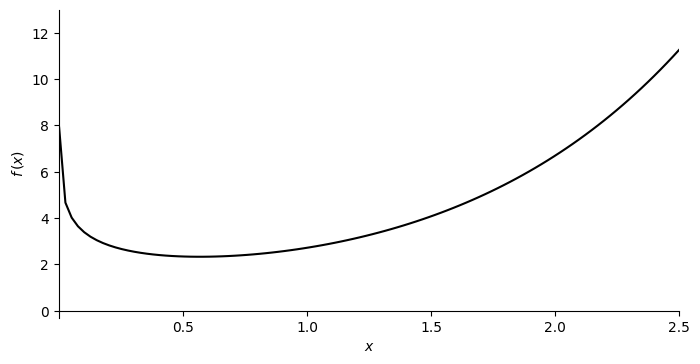

In [5]:
def plot_f(x_range, y_range, f, ox_position):
    x = np.linspace(*x_range, 100)
    fig, ax = plt.subplots(1,1,figsize=(8,4))

    ax.set_ylim(*y_range)
    ax.set_xlim(*x_range)
    ax.set_ylabel('$f\,(x)$')
    ax.set_xlabel('$x$')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position(('data', ox_position))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.autoscale(enable=False)
    
    pf = ax.plot(x, f(x), 'k')
    
    return fig, ax

plot_f([0.001, 2.5], [-0.3, 13], f_example, 0.0)

In [7]:
def newtons_method(dfdx1,dfdx2,iterations,x):
    for i in range(iterations):  # for the given number of iterations we are reducing the initial number inorder to find the root of the given function where the derivative is nearly zero
     x = x - dfdx1(x) / dfdx2(x)
    return x
num_iterations_example_1 = 25; x_initial = 1.6
newtons_example_1 = newtons_method(first_derivative, second_derivative, num_iterations_example_1,x_initial)
print("Newton's method result: x_min =", newtons_example_1)    

Newton's method result: x_min = 0.5671432904097838


In [9]:
def gradient_descent(x,dfdx1,iterations,learning_rate):
    for i in range(iterations):
        x = x - learning_rate * dfdx1(x)
    return x
num_iterations = 25; learning_rate = 0.1; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.2; x_initial = 1.6
gd_example_1 = gradient_descent(x_initial,first_derivative, num_iterations ,learning_rate)
print("Gradient descent result: x_min =", gd_example_1)      
#even though we get the root of the function using gradient descent , the step is much slower and there is also an extra parameter which is learning_rate, compared to the newtons_method


Gradient descent result: x_min = 0.5671434156768685


In [10]:
#newtons method of function having two variables
def f_example_2(x, y):  #this is just the regular function
    return x**4 + 0.8*y**4 + 4*x**2 + 2*y**2 - x*y -0.2*x**2*y

def grad_f_example_2(x, y):  #this is the first derivative of the function
    return np.array([[4*x**3 + 8*x - y - 0.4*x*y],
                     [3.2*y**3 +4*y - x - 0.2*x**2]])

def hessian_f_example_2(x, y):  #this is the second derivative of the given function known as hessian matrix
    hessian_f = np.array([[12*x**2 + 8 - 0.4*y, -1 - 0.4*x],
                         [-1 - 0.4*x, 9.6*y**2 + 4]])
    return hessian_f

x_0, y_0 = 4, 4
print(f"f{x_0, y_0} = {f_example_2(x_0, y_0)}")
print(f"grad f{x_0, y_0} = \n{grad_f_example_2(x_0, y_0)}")
print(f"H{x_0, y_0} = \n{hessian_f_example_2(x_0, y_0)}")

f(4, 4) = 528.0
grad f(4, 4) = 
[[277.6]
 [213.6]]
H(4, 4) = 
[[198.4  -2.6]
 [ -2.6 157.6]]


In [17]:
def newtons_mthd_two(x_y,hessian,grad,iterations):
    for i in range(iterations):
        x_y  = x_y - np.matmul(np.linalg.inv(hessian(x_y[0,0],x_y[1,0])),grad(x_y[0,0],x_y[1,0]))  #using the formulae of newton's method
        print(x_y)
    return x_y 
num_iterations_example_2 = 10; x_y_initial = np.array([[4], [4]])
newtons_example_2 = newtons_mthd_two(x_y_initial, hessian_f_example_2,grad_f_example_2,iterations=num_iterations_example_2)
print("Newton's method result: x_min, y_min =", newtons_example_2.T)    
    

[[2.58273866]
 [2.62128884]]
[[1.59225691]
 [1.67481611]]
[[0.87058917]
 [1.00182107]]
[[0.33519431]
 [0.49397623]]
[[0.04123585]
 [0.12545903]]
[[0.00019466]
 [0.00301029]]
[[-2.48536390e-08]
 [ 3.55365461e-08]]
[[ 4.15999751e-17]
 [-2.04850948e-17]]
[[0.]
 [0.]]
[[0.]
 [0.]]
Newton's method result: x_min, y_min = [[0. 0.]]


In [20]:
#now comparison with gradient descent
def gradient_two(x_y_initial,dfdx1,learning_rate,iterations):
    for i in range(iterations):
     x_y_initial = x_y_initial - learning_rate * dfdx1(x_y_initial[0,0],x_y_initial[1,0])
     print(x_y_initial)   
    return x_y_initial
print(gradient_two(x_y_initial,grad_f_example_2,0.02,300))    
#as using the higher learning_rate couldnot solve finding the root of the given function
#so using smaller learning rate required higher number of iterations,
#which shows that the gradient descent is much slower compared to the newtons method


[[-1.552]
 [-0.272]]
[[-1.00667816]
 [-0.27035727]]
[[-0.76722601]
 [-0.26354393]]
[[-0.61199381]
 [-0.2542789 ]]
[[-0.49957833]
 [-0.24362609]]
[[-0.41356991]
 [-0.23220381]]
[[-0.34561558]
 [-0.22041345]]
[[-0.29081322]
 [-0.20852957]]
[[-0.24600097]
 [-0.19674484]]
[[-0.20899755]
 [-0.1851958 ]]
[[-0.17822189]
 [-0.17397885]]
[[-0.15248504]
 [-0.1631609 ]]
[[-0.13086798]
 [-0.15278673]]
[[-0.11264557]
 [-0.14288438]]
[[-0.09723686]
 [-0.13346909]]
[[-0.08417097]
 [-0.12454632]]
[[-0.07306297]
 [-0.11611405]]
[[-0.0635961 ]
 [-0.10816464]]
[[-0.05550841]
 [-0.10068622]]
[[-0.04858239]
 [-0.09366384]]
[[-0.04263691]
 [-0.08708035]]
[[-0.03752071]
 [-0.08091713]]
[[-0.03310722]
 [-0.07515463]]
[[-0.02929035]
 [-0.06977285]]
[[-0.02598099]
 [-0.06475166]]
[[-0.02310421]
 [-0.06007107]]
[[-0.02059686]
 [-0.05571146]]
[[-0.01840572]
 [-0.05165372]]
[[-0.01648577]
 [-0.04787936]]
[[-0.01479896]
 [-0.04437062]]
[[-0.01331303]
 [-0.04111048]]
[[-0.01200059]
 [-0.03808275]]
[[-0.01083835]
 [-